In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
%matplotlib notebook

import ipysh
%aimport models.base
import Dummy_g1data as dummy
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
%aimport models.AEFIT3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


In [ ]:
ipysh.Bootstrap_support.debug()

In [2]:
qsh = Htls.QSH_Dataset()

In [3]:
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')

In [4]:
qsh.shuffle()
qsh.filter_number_set(15)
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  7756


# tSNE

In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

qsh.set_null(-1)
m = Htls.tSNE()
# m.perplexity = 50.
m.random = 42

ds = qsh[range(0,4000)]
dsc = np.concatenate([ds['prel'],ds['te']], axis=1)
# dsc = np.array(list(zip(ds['prel'],ds['te'])))
m(dsc)

p = Hsne.tSNE_PlotBokeh()
p.set_model(m)
p.set_data(qsh, 1000)
p.plot(notebook_url='http://172.17.0.2:8888')

In [5]:
qsh.set_null(np.nan)
qsh.clip_values(0.1,0.4)
qsh.set_normal_positive()

In [6]:
# FIT MODEL
# vae = aefit.AEFIT0(latent_dim=2, feature_dim=30)
vae = models.AEFIT3.AEFIT3(latent_dim=2, feature_dim=30)

AEFIT3 ready:


In [9]:
p = Hplt.LSPlotBokeh()
p.set_model(vae)
p.set_data(qsh)
p.plot(notebook_url='http://172.17.0.2:8888')

W0817 09:10:43.487917 140404541552448 deprecation.py:323] From /home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:203: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Loading BokehJS ...

In [11]:
# aefit.test_dummy(vae, qsh, batch=200, epoch=10)
models.base.train_thread(vae, data=qsh, epoch=5, batch=200, learning_rate=1e-3).control_panel()


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/5
38/38 [==============================] - 2s 62ms/step - loss: 16.2558 - accuracy: 0.9243 - sce: 16.2558 - akl: 9.0544 - kld: 9.2358 - v_mea: -0.8892 - v_std: 0.0157

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/5
38/38 [==============================] - 3s 72ms/step - loss: 16.2075 - accuracy: 0.9243 - sce: 16.2075 - akl: 8.6174 - kld: 8.8423 - v_mea: -0.7430 - v_std: 0.0180

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000729000034625642.
Epoch 3/5
38/38 [==============================] - 3s 66ms/step - loss: 16.1978 - accuracy: 0.9243 - sce: 16.1978 - akl: 9.5251 - kld: 9.7576 - v_mea: -0.7642 - v_std: 0.0113

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005314410154824146.
Epoch 4/5
38/38 [==============================] - 2s 63ms/step - loss: 16.1932 - accuracy: 0.9243 - sce: 16.1932 - akl: 9.9918 - kld: 1

## Test the same with a dummy mockup

In [12]:
import Dummy_g1data as dummy

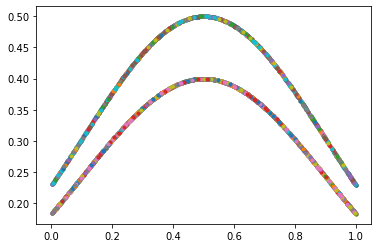

In [46]:
ds = dummy.Dummy_g1data(7000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [0.4], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.4], 'gain': [0.4]},    
]
ds.buffer()
dummy.test_gendata(ds)

In [53]:
d_vae = models.AEFIT3.AEFIT3(latent_dim=2, feature_dim=40, beta=1.)

AEFIT3 ready:


In [54]:
p = Hplt.LSPlotBokeh()
p.set_model(d_vae)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')


Loading BokehJS ...

In [56]:
# aefit.test_dummy(d_vae, ds, batch=100, epoch=10)
models.base.train_thread(d_vae, data=ds, epoch=20, batch=100, learning_rate=1e-3).control_panel()


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/20
70/70 [==============================] - 3s 42ms/step - loss: 23.1653 - accuracy: 1.0000 - sce: 23.1653 - akl: 10.0577 - kld: 8.0314 - v_mea: 0.5950 - v_std: 0.0817

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/20
70/70 [==============================] - 3s 36ms/step - loss: 23.0223 - accuracy: 1.0000 - sce: 23.0223 - akl: 12.3157 - kld: 10.8085 - v_mea: 0.7645 - v_std: 0.0141

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000729000034625642.
Epoch 3/20
70/70 [==============================] - 3s 39ms/step - loss: 23.0090 - accuracy: 1.0000 - sce: 23.0090 - akl: 11.9316 - kld: 10.6126 - v_mea: 0.7556 - v_std: 0.0142

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005314410154824146.
Epoch 4/20
70/70 [==============================] - 3s 38ms/step - loss: 23.0048 - accuracy: 1.0000 - sce: 23.0048 - akl: 12.6667 -